In [8]:
%matplotlib inline
import mlxtend
import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [12]:
from pandas import read_csv
data= read_csv('/Users/chensiyu/opt/anaconda3/pkgs/bokeh-2.3.2-py38hecd8cb5_0/lib/python3.8/site-packages/bokeh/sampledata/_data/iris.csv')
X= data.drop('species', axis=1)
y=data['species']
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [13]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = LogisticRegression( )    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [14]:
import warnings
warnings.filterwarnings("ignore")

label = ['Decision Tree', 'LR', 'Bagging Tree', 'Bagging LR']
clf_list = [clf1, clf2, bagging1, bagging2]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(scores.mean(), scores.std(), label))

Accuracy:   (0.66, 0.0, 'Decision Tree')
Accuracy:   (0.9733333333333333, 0.009428090415820642, 'LR')
Accuracy:   (0.84, 0.1296148139681572, 'Bagging Tree')
Accuracy:   (0.9666666666666667, 0.009428090415820642, 'Bagging LR')


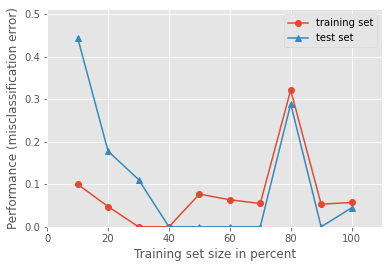

In [15]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [17]:
#Ensemble Size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_std

[0.13199326582148882,
 0.024944382578492918,
 0.016329931618554536,
 0.1329995822884,
 0.018856180831641232,
 0.016329931618554536,
 0.016329931618554488,
 0.018856180831641232,
 0.009428090415820642]

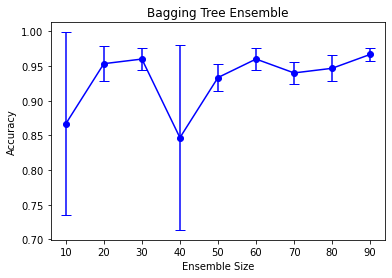

In [18]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

In [19]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [23]:
#Ensemble Size
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

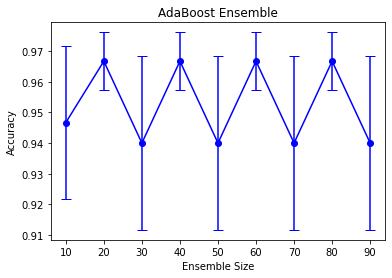

In [24]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()